In [1]:
import partialRegionBDT
import pickle
import uproot
import os
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
import math as mth
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from hist import Hist
import hist
from scipy import stats
import random

In [2]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [3]:
mcFile1 = uproot.open("/local/cms/user/revering/datafiles/combineInputs/histograms_23_6_14/ZmmSim_BaseEventFiltered.root")
events1=mcFile1["demo"]["partialDisappear"]["sigVariables"]
allfeatures1 = events1.keys()
print(allfeatures1)

mcFile = uproot.open("/local/cms/user/revering/datafiles/combineInputs/histograms_23_7_5/ZmmSim_BaseEventFiltered.root")
events=mcFile["demo"]["partialDisappear"]["sigVariables"]
allfeatures = events.keys()
print(allfeatures)
print(len(allfeatures1))

['pt', 'eta', 'phi', 'staDR', 'staPhi', 'staE', 'standaloneDEoverE', 'staChi', 'cscDR', 'probeCharge', 'ecalIso', 'cellEdgeDeta', 'cellEdgeDphi', 'PUupWeight', 'PUdownWeight', 'IDupWeight', 'IDdownWeight', 'ISOupWeight', 'ISOdownWeight', 'TrigUpWeight', 'TrigDownWeight', 'EnBinWeight', 'lumi', 'event', 'cscDRbyStation_0', 'dtDRbyStation_0', 'cscDEtabyStation_0', 'dtDEtabyStation_0', 'cscDPhibyStation_0', 'dtDPhibyStation_0', 'cscDZbyStation_0', 'dtDZbyStation_0', 'cscDRbyStation_1', 'dtDRbyStation_1', 'cscDEtabyStation_1', 'dtDEtabyStation_1', 'cscDPhibyStation_1', 'dtDPhibyStation_1', 'cscDZbyStation_1', 'dtDZbyStation_1', 'cscDRbyStation_2', 'dtDRbyStation_2', 'cscDEtabyStation_2', 'dtDEtabyStation_2', 'cscDPhibyStation_2', 'dtDPhibyStation_2', 'cscDZbyStation_2', 'dtDZbyStation_2', 'cscDRbyStation_3', 'dtDRbyStation_3', 'cscDEtabyStation_3', 'dtDEtabyStation_3', 'cscDPhibyStation_3', 'dtDPhibyStation_3', 'cscDZbyStation_3', 'dtDZbyStation_3', 'HEDepth_0', 'found_HEDepth_0', 'HEDepth

In [4]:
set1 = set(allfeatures1)
set2 = set(allfeatures)

in_list1_not_list2 = list(set1 - set2)
new_features = list(set2 - set1)

print(in_list1_not_list2)
print(new_features) # gives features which have been added in the 23_7_5 version

[]
['refitStadPhi', 'disStadEta', 'refitStaE', 'disStadPhi', 'disStaChi2', 'refitStaDEoverE', 'refitStadEta', 'disStaDEoverE', 'refitStaChi2']


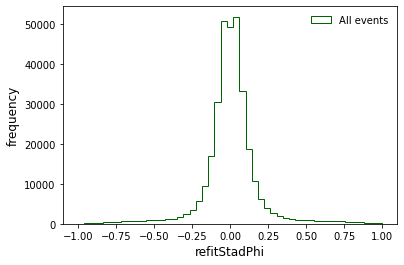

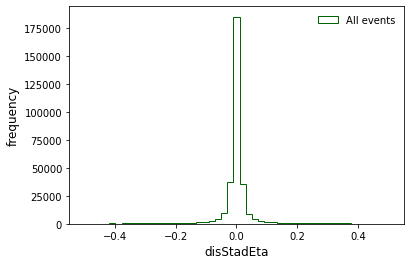

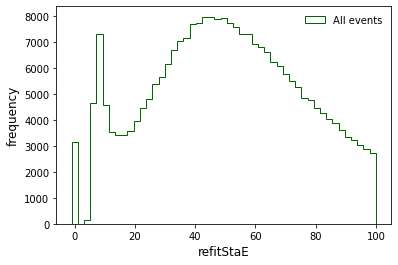

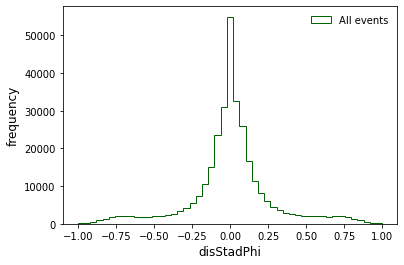

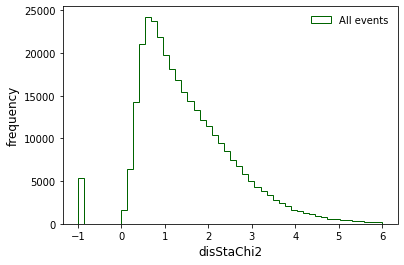

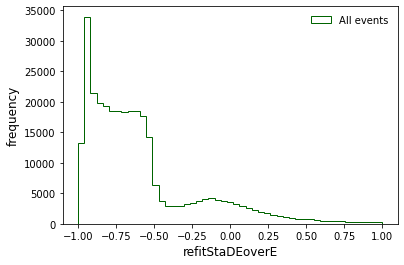

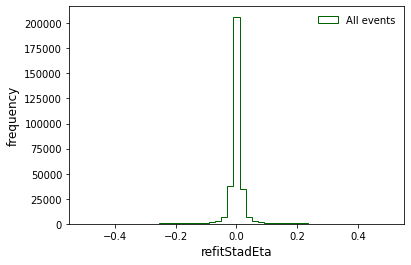

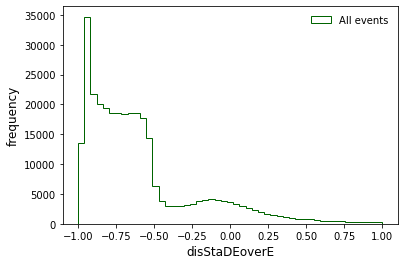

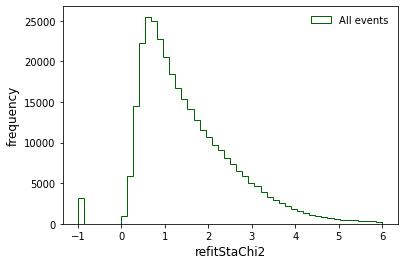

In [5]:
added_Data = events.arrays(new_features, library="pd")

for feature in new_features:
    if 'DEoverE' in feature or 'dPhi' in feature: bins=np.linspace(-1,1,50)
    elif 'dEta' in feature: bins=np.linspace(-0.5,0.5,50)
    elif 'StaE' in feature: bins=np.linspace(-1,100,50)
    else: bins=50
    plt.figure();
    plt.hist(added_Data[feature],bins=bins,histtype='step',color='darkgreen',label='All events');
    # make the plot readable
    plt.xlabel(str(feature),fontsize=12);
    plt.ylabel('frequency',fontsize=12);
    plt.legend(frameon=False);
    

In [6]:
bremFile1 = uproot.open("/local/cms/user/revering/datafiles/combineInputs/histograms_23_6_14/ZmmDBrem_map0p2_ecalBrem.root")
brem_events1=bremFile1["demo"]["partialDisappear"]["sigVariables"]
brem_features1 = brem_events1.keys()

bremFile = uproot.open("/local/cms/user/revering/datafiles/combineInputs/histograms_23_7_5/ZmmDBrem_map0p2_ecalBrem.root")
brem_events=bremFile["demo"]["partialDisappear"]["sigVariables"]
brem_features = events.keys()

set1 = set(brem_features1)
set2 = set(brem_features)

in_list1_not_list2 = list(set1 - set2)
brem_new_features = list(set2 - set1)

print(in_list1_not_list2)
print(brem_new_features) # gives features which have been added in the 23_7_5 version

[]
['cscDEtabyStation_1', 'dtDEtabyStation_1', 'disStaChi2', 'dtDPhibyStation_1', 'refitStaDEoverE', 'dtDPhibyStation_3', 'dtDRbyStation_1', 'dtDZbyStation_1', 'refitStadPhi', 'cscDZbyStation_0', 'refitStaE', 'dtDPhibyStation_0', 'cscDEtabyStation_0', 'cscDZbyStation_3', 'cscDPhibyStation_0', 'cscDEtabyStation_2', 'cscDPhibyStation_3', 'dtDEtabyStation_0', 'cscDPhibyStation_2', 'dtDZbyStation_2', 'cscDZbyStation_1', 'dtDRbyStation_3', 'dtDRbyStation_0', 'disStadEta', 'cscDEtabyStation_3', 'dtDEtabyStation_2', 'dtDZbyStation_3', 'refitStadEta', 'dtDEtabyStation_3', 'disStaDEoverE', 'dtDZbyStation_0', 'refitStaChi2', 'cscDZbyStation_2', 'cscDPhibyStation_1', 'dtDRbyStation_2', 'disStadPhi', 'dtDPhibyStation_2']


In [7]:
res=all(ele in brem_new_features for ele in new_features)
print(str(res)) # brem_new_features contains all new_features

True
